In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [41]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [42]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [43]:
df_train, df_test = train_test_split(df, random_state=42)

In [44]:
n_samples = 5000

df_class_0 = df_train[df_train['Diabetes_012'] == 0]
df_class_1 = df_train[df_train['Diabetes_012'] == 1]
df_class_2 = df_train[df_train['Diabetes_012'] == 2]


df_class_1_oversampled = resample(df_class_1,
                                  replace=True, 
                                  n_samples=n_samples,  
                                  random_state=42) 

df_class_0_undersampled = resample(df_class_0,
                                   replace=False, 
                                   n_samples=n_samples, 
                                   random_state=42)

df_class_2_undersampled = resample(df_class_2,
                                   replace=False,
                                   n_samples=n_samples,
                                   random_state=42)

df_balanced = pd.concat([df_class_0_undersampled, df_class_1_oversampled, df_class_2_undersampled])

df_train = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_train['Diabetes_012'].value_counts())


Diabetes_012
2.0    5000
1.0    5000
0.0    5000
Name: count, dtype: int64


In [45]:
X_train,y_train = df_train.drop("Diabetes_012", axis=1), df_train["Diabetes_012"]
X_test,y_test = df_test.drop("Diabetes_012", axis=1), df_test["Diabetes_012"]

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  stratify=y_train, 
                                                  random_state=42)


In [96]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', restore_best_weights=True, patience=50)
optimizer = Adam(learning_rate=0.001)
model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(20, activation = 'relu'),
        Dense(15, activation = 'relu'),        
        Dense(10, activation = 'relu'),
        Dense(3, activation='softmax')
                   ])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_val, y_val),shuffle=True,callbacks=early_stopping, verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4000 - loss: 1.0927 - val_accuracy: 0.4843 - val_loss: 0.9847
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5109 - loss: 0.9687 - val_accuracy: 0.4900 - val_loss: 0.9741
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5159 - loss: 0.9565 - val_accuracy: 0.5023 - val_loss: 0.9728
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5281 - loss: 0.9459 - val_accuracy: 0.5107 - val_loss: 0.9682
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5321 - loss: 0.9414 - val_accuracy: 0.5110 - val_loss: 0.9658
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5327 - loss: 0.9366 - val_accuracy: 0.5087 - val_loss: 0.9638
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5377 - loss: 0.9281 - val_accuracy: 0.5120 - val_loss: 0.9633
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5257 - loss: 0.9347 - val_accuracy: 0.

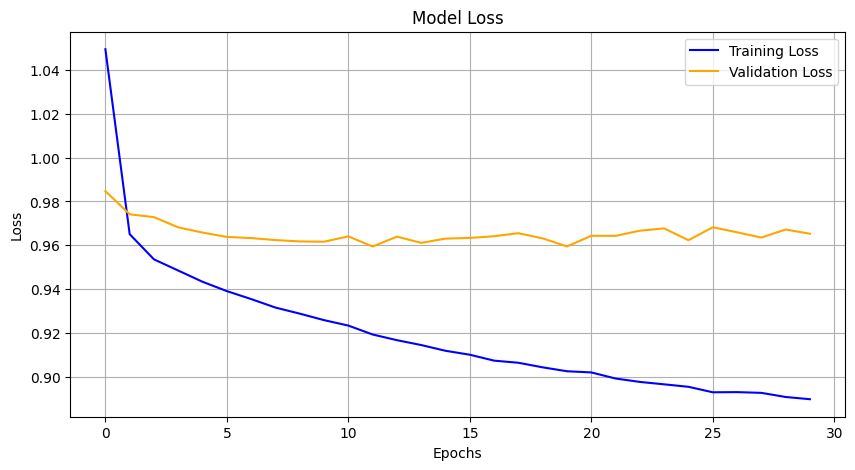

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

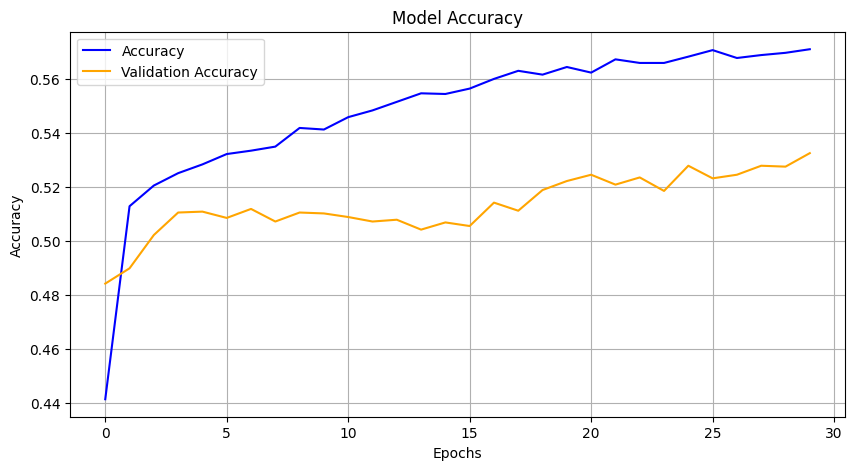

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [99]:
Predictions = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, Predictions))

1982/1982 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step
              precision    recall  f1-score   support

         0.0       0.96      0.59      0.73     53478
         1.0       0.03      0.38      0.05      1179
         2.0       0.32      0.56      0.41      8763

    accuracy                           0.58     63420
   macro avg       0.44      0.51      0.40     63420
weighted avg       0.85      0.58      0.67     63420

